Explain the theory of mind. 

In the theory of mind is the ability to from representations about other's internal mental states such as though, feelings and beliefs.


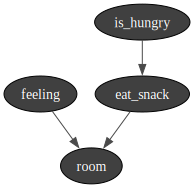


  room                       |
Shower   |Room     |Kitchen  |
---------|---------|---------|
 0.3400  | 0.3400  | 0.3200  |



In [3]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb


bn = gum.BayesNet('Theory of mind')

hungry = bn.add(gum.LabelizedVariable('is_hungry', 'is_hungry', ['True', 'False']))
eat_snack = bn.add(gum.LabelizedVariable('eat_snack', 'eat_snack', ['True', 'False']))
room = bn.add(gum.LabelizedVariable('room', 'room', ['Shower', 'Room', 'Kitchen']))
feeling = bn.add(gum.LabelizedVariable('feeling', 'feeling', ['Lazy', 'not_lazy']))

bn.addArc(hungry, eat_snack)
bn.addArc(eat_snack, room)
bn.addArc(feeling, room)

bn.cpt(hungry).fillWith([0.5, 0.5])
bn.cpt(eat_snack)[{'is_hungry':'True'}] = [0.8, 0.2]
bn.cpt(eat_snack)[{'is_hungry':'False'}] = [0.2,0.8]
bn.cpt(feeling).fillWith([0.4, 0.6])
bn.cpt(room)[{'feeling':'Lazy', 'eat_snack':'True'}] = [0.1, 0.7, 0.2]
bn.cpt(room)[{'feeling':'Lazy', 'eat_snack':'False'}] = [0.1, 0.6, 0.3]
bn.cpt(room)[{'feeling':'not_lazy', 'eat_snack':'True'}] = [0.5,0.1, 0.4]
bn.cpt(room)[{'feeling':'not_lazy', 'eat_snack':'False'}] = [0.5,0.1, 0.4]

gnb.show(bn)

ie = gum.LazyPropagation(bn)
ie.setEvidence({'is_hungry':'True', 'eat_snack':'True'})
ie.makeInference()
prob = ie.posterior(room)
print(prob)
